# 02. Neural Network Classfication with PyTorch

classfication is a problem of prediction whether something is one thing or another (there can be multiple things as the options)

https://www.learnpytorch.io/02_pytorch_classification/

## 1. Make clasffication data and get it ready

In [1]:
from sklearn.datasets import  make_circles

# make 1000 samples 
n_samples = 1000

# Create cirles
X, y = make_circles(n_samples, noise=0.03, random_state = 42) 


In [2]:
len(X), len(y)

(1000, 1000)

In [3]:
print(f"First 5 samples of X : \n {X[:5]}")
print(f"First 5 samples of y : \n {y[:5]}")

First 5 samples of X : 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y : 
 [1 1 1 1 0]


In [6]:
# Make dataframe of circle data  
import pandas as pd 

circles = pd.DataFrame({"X1" : X[:,0], "X2": X[:,1], "Label" :y})
circles

,X1,X2,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


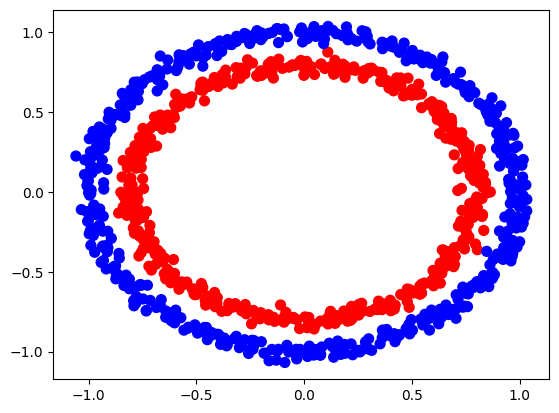

In [23]:
#  Visualize, visuzlize and visualize 
import matplotlib.pyplot as plt 
plt.scatter(x = circles["X1"], y = circles["X2"],  c=circles["Label"], cmap="bwr", s=50)

**Note:** The date we're working with is often refered to as a toy dataset, a dataset that is samll enough to experiment but still sizeable enough to practice the fundamentals. 

### 1.1 Check input and output shapes

In [24]:
X.shape, y.shape

((1000, 2), (1000,))

In [26]:
# View the first example of features and labels 
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shape for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shape for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensor and create train and test splits

In [27]:
# Turn data into tensors
import torch 
torch.__version__

'2.8.0+cu126'

In [28]:
type(X)

numpy.ndarray

In [29]:
# turn data into tensor 
X = torch.from_numpy(X).type(torch.float) 
y = torch.from_numpy(y).type(torch.float) 


X[:5] 

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        [-0.3937,  0.6929],
        [ 0.4422, -0.8967]])

In [31]:
type(X)

torch.Tensor

In [33]:
# split data into training and test sets
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 42, test_size = 0.2)

In [35]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model 

lets' build a model to classify our blue and red dots 

To do so, we want to:
1. Setup device agnostic code so our code will run on an accelerator (GPU) if there is one
2. Construct a model (By Subclassing `nn.Module`) 
3. Define a loss function and optimizer 
4. Create a training and test loop

In [38]:
import torch 
from torch import nn 

# Make device agnostic code 
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [39]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Now we've setup device agnostic code, let's create a model that:

1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers taht are capable of handling the shapes our data
3. Defines a `forward` method that outlines the forward pass (or forward computation) of the model 
4. Instatiate an instance of our model class and send it to the target `device`

In [ ]:
# 1. Construct a model that subclasses nn.Module 
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling the shapes our data 
        self.layer_1 = nn.Linear(in_features = 2, out_features=5) #takes in 2 features and upscales to 5 features
        self.layer_2 = nn.Linear(in_features = 5, out_features=1) #takes in 5 features from prev layer and outputs a single feature (same shape as y)
    # 3. Define a forward() method that outlines the forward pass 
    def forward(self,x):
        return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output
    
# 4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [47]:
next(model_0.parameters())

Parameter containing:
tensor([[ 0.1527, -0.4855],
        [-0.7028,  0.3579],
        [ 0.3331, -0.5527],
        [ 0.5322,  0.3866],
        [ 0.1337, -0.4078]], device='cuda:0', requires_grad=True)

In [51]:
# Lets  replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features= 5),
    nn.Linear(in_features=5, out_features= 1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [54]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.1911, -0.2662],
                      [ 0.2320,  0.0718],
                      [ 0.3077, -0.2092],
                      [ 0.1813, -0.3008],
                      [-0.2159,  0.5461]], device='cuda:0')),
             ('0.bias',
              tensor([-0.3748,  0.3484, -0.4318,  0.4371,  0.1814], device='cuda:0')),
             ('1.weight',
              tensor([[-0.4238, -0.3218, -0.0579,  0.3702, -0.0647]], device='cuda:0')),
             ('1.bias', tensor([-0.0116], device='cuda:0'))])

In [58]:
# Make predictions 
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions : {len(untrained_preds)}, shape :{untrained_preds.shape}")
print(f"Length of test samples : {len(X_test)} , shape {X_test.shape}")
print(f"\n First 10 predictions\n {untrained_preds[:10]}")
print(f"\n First 10 Labels :\n {y_test[:10]}")

Length of predictions : 200, shape :torch.Size([200, 1])
Length of test samples : 200 , shape torch.Size([200, 2])

 First 10 predictions
 tensor([[0.2142],
        [0.1657],
        [0.2892],
        [0.1932],
        [0.2065],
        [0.1775],
        [0.1065],
        [0.1090],
        [0.2926],
        [0.1615]], device='cuda:0')

 First 10 Labels :
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer 

which loss function or optimizer should you use?

Again... this is problem specific.

For example for regression you might want MAE or MSE (mean absolute error or mean squared error)

for classification you might want binary cross entropy or categorical cross entropy  (cross entropy)

as a reminder, the loss function measure how **wrong**  our model 

and for optimizers, two of the most common and useful are SGD and Adam, 

* for the loss function we're going to use `torch.nn.BECWithLogutsLoss()`, for more on what binary cross entropy (BCE) is, check out this article https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a/



In [59]:
# Setup the loss function
# loss_fn = nn.BCELoss # BCELoss = require inputs to have gone through the sigmoid activation function prior to BCELoss
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built-in 

optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.1, )

In [60]:
# Calculate accuracy  - out of 100 examples, what percentage dous our model get right? 
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    
    acc = (correct/len(y_pred)) *100
    
    return acc 
